In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from import_me import *
import numpy as np
import cv2

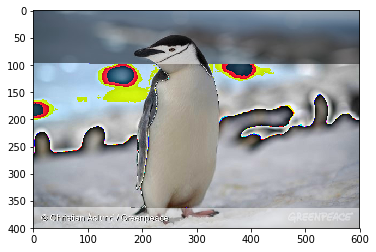

In [3]:
array = readSave(readfileName = "bmpRTL_1.data")
plt.imshow(plt.imread("output.bmp"))

In [4]:
a

NameError: name 'a' is not defined

In [5]:
with open("red_dot.bmp", "rb") as f:
    b = f.read()
red_dot_orig = np.frombuffer(b, dtype = np.uint8)

In [76]:
with open("bmpRTL_25ganhotx.data", "rb") as f:
    b = f.read()
red_dot_tx = np.frombuffer(b, dtype = np.uint8)

In [8]:
with open("orig_pinguim.bmp", "rb") as f:
    c = f.read()
orig = np.frombuffer(c, dtype = np.uint8)

In [13]:
orig.shape[0] == 600 * 400 * 3 + 122

True

In [19]:
array[122:]

array([192, 189, 185, ..., 167, 151, 138], dtype=uint8)

In [21]:
orig[122:]

array([192, 189, 185, ..., 167, 151, 138], dtype=uint8)

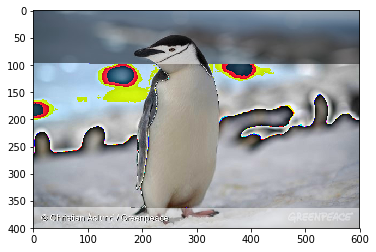

In [37]:
rx_array_flipped = np.flipud(array[122:].reshape(400, 600, 3))
rx_array_flipped_rgb = cv2.cvtColor(rx_array_flipped, cv2.COLOR_BGR2RGB)


plt.imshow(rx_array_flipped_rgb)

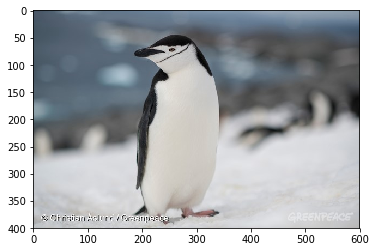

In [38]:
orig_array_flipped = np.flipud(orig[122:].reshape(400, 600, 3))
orig_array_flipped_rgb = cv2.cvtColor(orig_array_flipped, cv2.COLOR_BGR2RGB)

plt.imshow(orig_array_flipped_rgb)

In [45]:
b = rx_array_flipped_rgb.ravel()

In [46]:
a = orig_array_flipped_rgb.ravel()

In [51]:
np.nonzero(a-b)

(array([176400, 176401, 176402, ..., 653397, 653398, 653399]),)

In [67]:
a[176400-1:653399+2]

array([ 84,  70,  86, ..., 197, 199, 194], dtype=uint8)

In [68]:
b[176400-1:653399+2]

array([ 84, 140, 172, ..., 139, 143, 194], dtype=uint8)

In [92]:
bin(143)

'0b10001111'

In [93]:
bin(199)

'0b11000111'

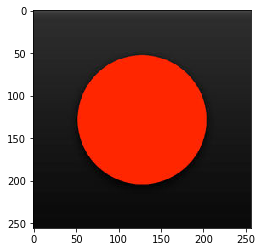

In [77]:
red_dot_orig_flipped = np.flipud(red_dot_orig[122:].reshape(256, 256, 3))
red_dot_orig_flipped_rgb = cv2.cvtColor(red_dot_orig_flipped, cv2.COLOR_BGR2RGB)

plt.imshow(red_dot_orig_flipped_rgb)

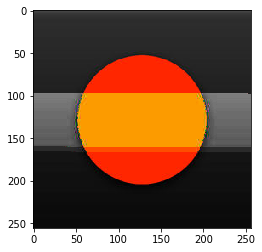

In [80]:
red_dot_tx_flipped = np.flipud(a2[122:].reshape(256, 256, 3))
red_dot_tx_flipped_rgb = cv2.cvtColor(red_dot_tx_flipped, cv2.COLOR_BGR2RGB)

plt.imshow(red_dot_tx_flipped_rgb)

In [86]:
c = red_dot_orig_flipped_rgb.ravel()
d = red_dot_tx_flipped_rgb.ravel()

In [87]:
np.nonzero(c-d)

(array([ 75264,  75265,  75266, ..., 128253, 128254, 128255]),)

In [90]:
c[75264-1:128255+2]

array([32, 32, 32, ..., 21, 21, 21], dtype=uint8)

In [91]:
d[75264-1:128255+2]

array([ 32, 128, 128, ...,  42,  42,  21], dtype=uint8)

In [98]:
#np.mean(np.equal(red_dot_orig, array))

In [99]:
#np.sum(array-orig)

In [100]:
search_sequence_numpy(red_dot_orig, np.array([66, 77]))

array([0, 1])

In [101]:
search_sequence_numpy(orig, np.array([66, 77]))

array([     0,      1,  43891,  43892, 316489, 316490])

ValueError: cannot reshape array of size 196730 into shape (400,600,3)

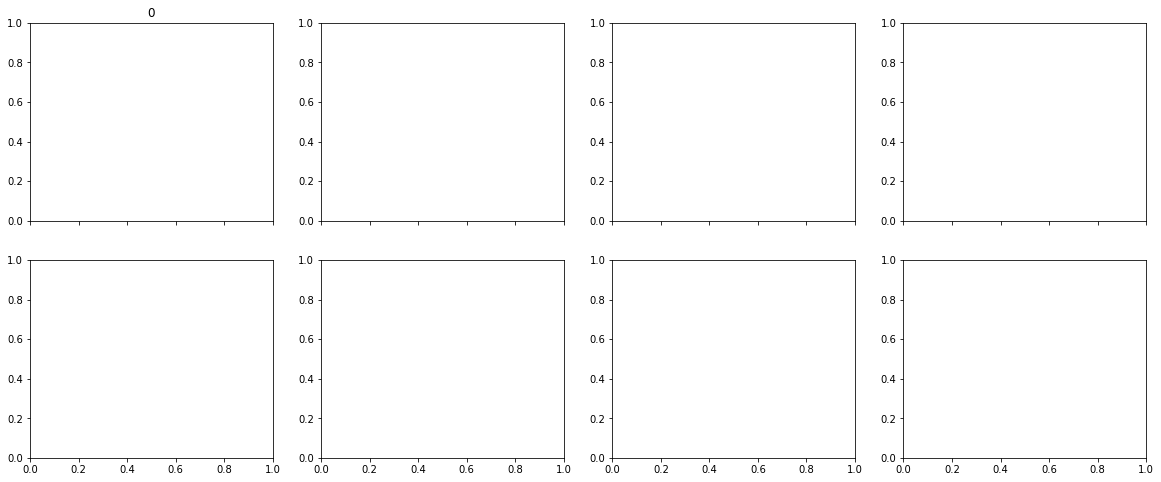

In [102]:
fig, ax = plt.subplots(2, 4, sharex=True, figsize=(20, 8))


#0, 1, 2
roll_cor = 1

for i in range(8):
    rcv_t = np.roll(np.packbits(np.roll(np.unpackbits(rcv), i)), roll_cor)
    ax[i//4, i%4].set_title(i)
    ax[i//4, i%4].imshow(rcv_t.reshape(400, 600, 3))